# Exploring
TODO: Add txt

In [1]:
import os
import sys
import matplotlib.pyplot as plt

# Import module up a directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import rooflineModel as rfm


### Change results to the directory with benchmark output.

In [74]:
csvDir = "./csvs"
results = "../convergenceTest/good/"
data = rfm.getCartDataframe(results, csvDir=csvDir, force=True)
data['batch_frequency'] = data['batch_frequency'].mask(data['batch_frequency'] == -1, 100)
which = data["which"].unique()
batchFrequency = data["batch_frequency"].unique()
batchFrequency.sort()
ranks = data["ranks"].unique()
ranks.sort()
episodeBlock = data["episode_block"].unique()
print("which", which)
print("batch frequency", batchFrequency)
print("ranks", ranks)
print("episode block", episodeBlock, episodeBlock.dtype)

Writing ./csvs/___convergenceTest_good_.csv
which ['async' 'sync']
batch frequency [  1   2   5  10  50 100]
ranks [ 1  2  5  9 17 24]
episode block [False  True] bool


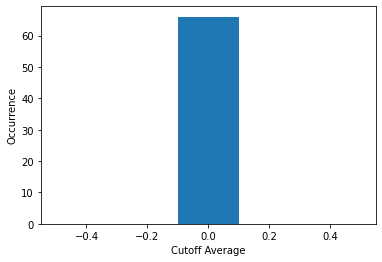

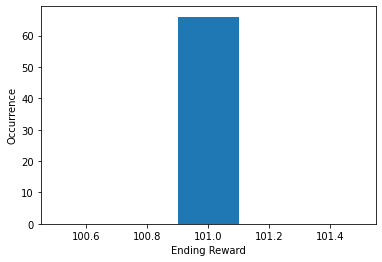

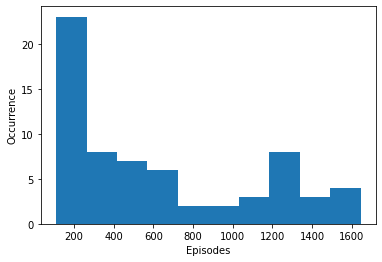

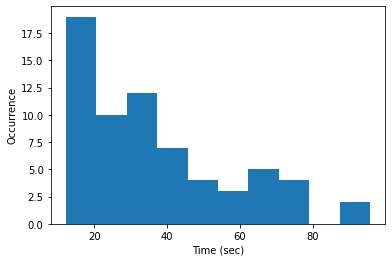

In [75]:
cols = ["average", "last", "converged", "time"]
labels = ["Cutoff Average", "Ending Reward", "Episodes", "Time (sec)"]
bins = [5, 5, 10, 10]
for col, label, bin in zip(cols, labels, bins): 
    plt.hist(data[col], align="mid", bins=bin)
    plt.xlabel(label)
    plt.ylabel("Occurrence")
    plt.show()

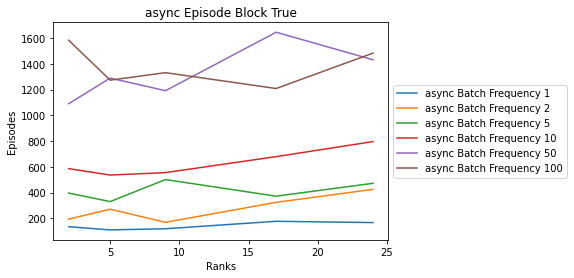

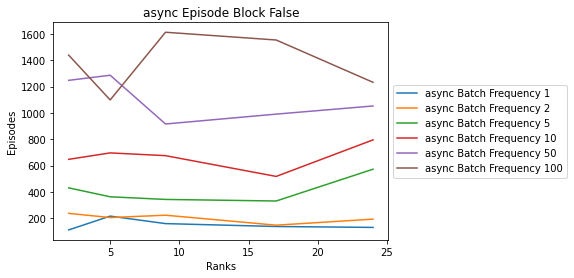

In [76]:
plotType = plt.plot
# plotType = plt.scatter
for w in which:
        if plotType is plt.scatter or (plotType is plt.plot and w != "sync"):
                for ep in [True, False]:
                        if w == "async" or not (plotType is plt.scatter and ep):
                                for b in batchFrequency:
                                        toPlot = data[(data["which"] == w) & (data["batch_frequency"] == b) & (data["episode_block"] == ep)]
                                        toPlot = toPlot.sort_values(by=["ranks"])
                                        plotType(toPlot["ranks"], toPlot["converged"], label=w + " Batch Frequency " + str(b))
                                plt.title(w + " Episode Block " + str(ep))
                                plt.xlabel("Ranks")
                                plt.ylabel("Episodes")
                                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
                                plt.show()

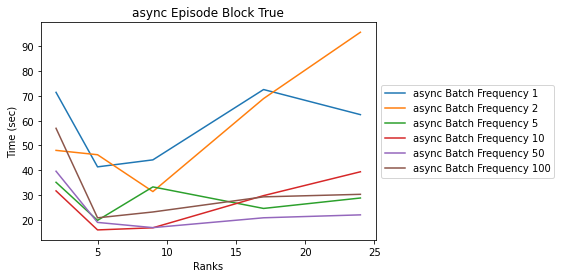

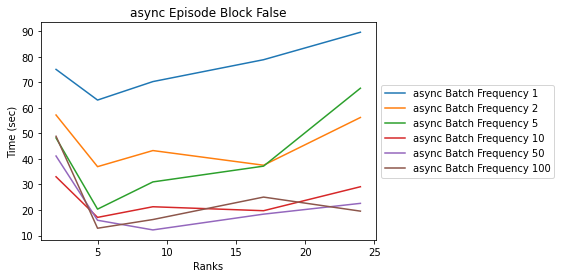

In [77]:
# plotType =  plt.scatter
plotType =  plt.plot
for w in which:
        if plotType is plt.scatter or (plotType is plt.plot and w != "sync"):
                for ep in [True, False]:
                        if w == "async" or not (plotType is plt.scatter and ep):
                                for b in batchFrequency:
                                        toPlot = data[(data["which"] == w) & (data["batch_frequency"] == b) & (data["episode_block"] == ep)]
                                        toPlot = toPlot.sort_values(by=["ranks"])
                                        plotType(toPlot["ranks"], toPlot["time"], label=w + " Batch Frequency " + str(b))
                                plt.title(w + " Episode Block " + str(ep))
                                plt.xlabel("Ranks")
                                plt.ylabel("Time (sec)")
                                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
                                plt.show()

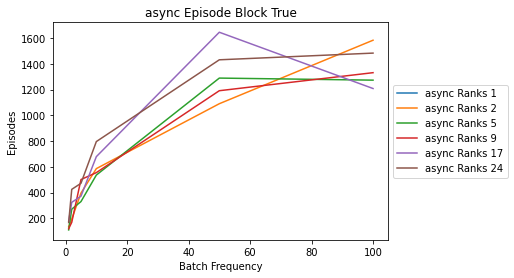

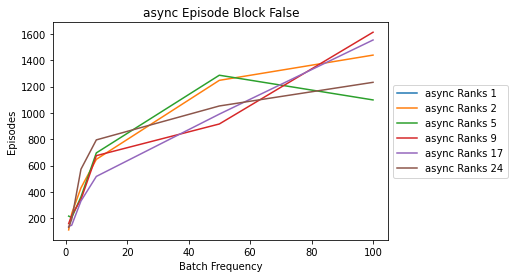

In [78]:
plotType = plt.plot
# plotType = plt.scatter
for w in which:
        if plotType is plt.scatter or (plotType is plt.plot and w != "sync"):
                for ep in [True, False]:
                        if w == "async" or not (plotType is plt.scatter and ep):
                                for r in ranks:
                                        toPlot = data[(data["which"] == w) & (data["ranks"] == r) & (data["episode_block"] == ep)]
                                        toPlot = toPlot.sort_values(by=["batch_frequency"])
                                        plotType(toPlot["batch_frequency"], toPlot["converged"], label=w + " Ranks " + str(r))
                                plt.title(w + " Episode Block " + str(ep))
                                plt.xlabel("Batch Frequency")
                                plt.ylabel("Episodes")
                                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
                                plt.show()

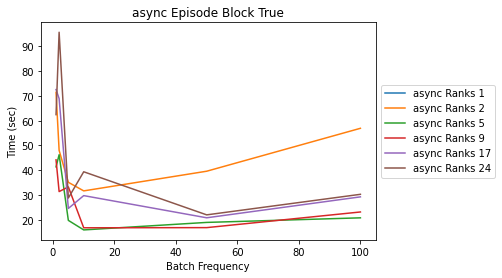

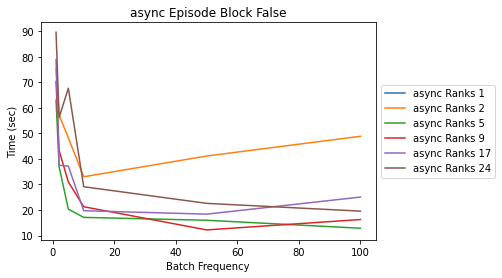

In [79]:
plotType = plt.plot
# plotType = plt.scatter
for w in which:
        if plotType is plt.scatter or (plotType is plt.plot and w != "sync"):
                for ep in [True, False]:
                        if w == "async" or not (plotType is plt.scatter and ep):
                                for r in ranks:
                                        toPlot = data[(data["which"] == w) & (data["ranks"] == r) & (data["episode_block"] == ep)]
                                        toPlot = toPlot.sort_values(by=["batch_frequency"])
                                        plotType(toPlot["batch_frequency"], toPlot["time"], label=w + " Ranks " + str(r))
                                plt.title(w + " Episode Block " + str(ep))
                                plt.xlabel("Batch Frequency")
                                plt.ylabel("Time (sec)")
                                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
                                plt.show()

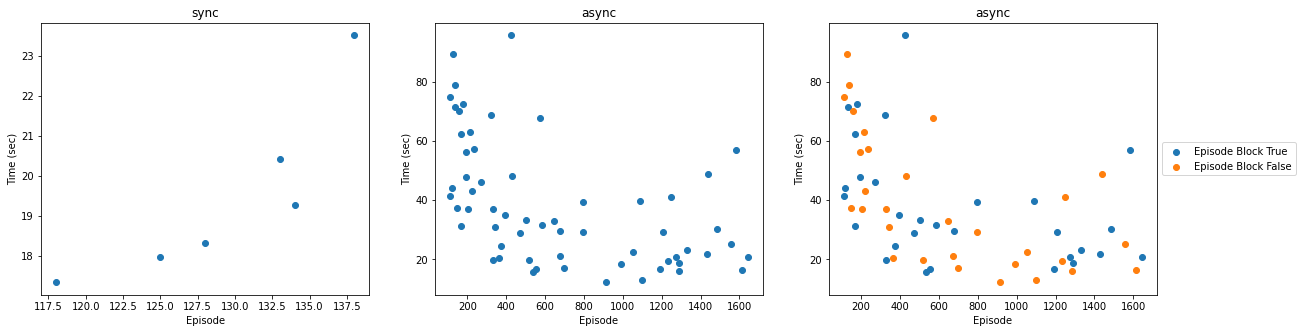

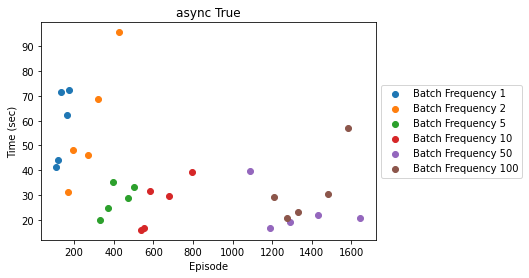

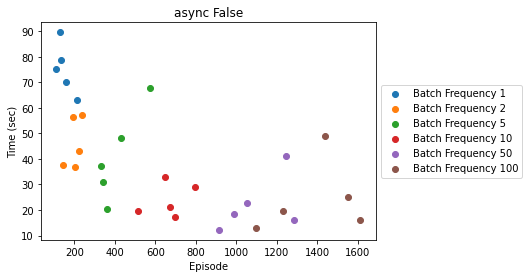

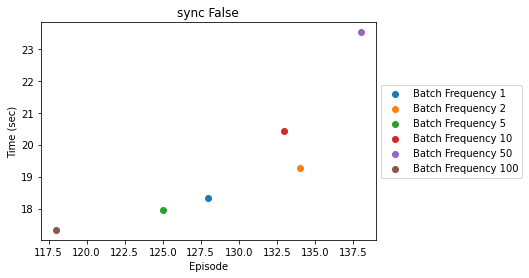

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
# plt.subplots_adjust(hspace=.5, wspace=.75)

toPlot = data[(data["which"] == "sync")]
axes[0].scatter(toPlot["converged"], toPlot["time"])
axes[0].set_title("sync")
axes[0].set_xlabel("Episode")
axes[0].set_ylabel("Time (sec)")

toPlot = data[(data["which"] == "async")]
axes[1].scatter(toPlot["converged"], toPlot["time"])
axes[1].set_title("async")
axes[1].set_xlabel("Episode")
axes[1].set_ylabel("Time (sec)")

for ep in [True, False]:
        toPlot = data[(data["which"] == "async") & (data["episode_block"] == ep)]
        axes[2].scatter(toPlot["converged"], toPlot["time"], label="Episode Block " + str(ep))
        axes[2].set_title("async")
        axes[2].set_xlabel("Episode")
        axes[2].set_ylabel("Time (sec)")
        axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

for w in which:
        for ep in [True, False]:
                if w == "async" or not ep:
                        for b in batchFrequency:
                                toPlot = data[(data["which"] == w) & (data["batch_frequency"] == b) & (data["episode_block"] == ep)]
                        # for r in ranks:
                        #         toPlot = data[(data["which"] == w) & (data["ranks"] == r) & (data["episode_block"] == ep)]
                        # # toPlot = data[(data["which"] == w) & (data["episode_block"] == ep)]
                                plt.scatter(toPlot["converged"], toPlot["time"], label="Batch Frequency " + str(b))
                        plt.title(w + " " + str(ep))
                        plt.xlabel("Episode")
                        plt.ylabel("Time (sec)")
                        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
                        plt.show()

## Plotting the Roofline
Our next step is to plot the rooflines with the upper and lower bounds we found in the network abstraction notebook.  We will look at tile sizes of 1 (i.e. message sizes of 8 bytes) first.

In [6]:
baseGHz = 2.8
turboGHz = 3.7
cores = 1
baseFP = 16 * baseGHz * cores * 1E9
peakFP = 16 * turboGHz * cores * 1E9

print("Base FLOPS:", baseFP, "Peak FLOPS:", peakFP)
pi = [("Base FP", 0, baseFP), ("Peak FP", 0, peakFP)]

messageSizes = [8]
betas = [("Bandwidth " + str(size), bandwidths.loc[size, "Max Bandwidth"], 0) for size in messageSizes]
betas.extend([("Latency " + str(size), bandwidths.loc[size, "Max Latency"], 0) for size in messageSizes])

Base FLOPS: 44800000000.0 Peak FLOPS: 59200000000.0


In this roofline we will focus on the scale benchmark.  To provide a more reasonable upper bound, we use the performance of the original scale benchmark.  We will look at two refinements to pi.  The first is running the default stream benchmark.  This will have none of the MPI calls or additional loops/conditionals.  The second $\pi$ will be calling the (modified) stream code with the additional loops/conditionals on a single rank.  The MPI calls will not be called however since all tiles will be owned by a single rank.  The performance of modified stream changes as we change the size of the tile.  We will explore this later in the notebook, however for now we plot the lowest observed modified stream performance.  Notice that the throughput (performance rate) is lower than the original stream benchmark.  This is due to the instruction mix.

In [7]:
rate = simple["scaleOpts"]/(simple["scaleMin"])
pi.append(("Default Stream", 0, list(rate)[0]))

rate = serial["scaleOpts"]/(serial["scaleMax"])
pi.append(("Modified Stream", 0, rate.min()))


Lastly, we plot the roofline.  For the distribution method, we add an amortized analysis line.  The amortized analysis line is used when the network operations can't be overlapped with the floating-point execution.

1 100000.0 100000000.0 10000000000000.0


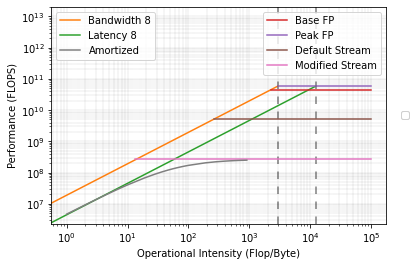

In [8]:
rf = rfm.Roofline(pi, betas, "Operational Intensity (Flop/Byte)", "Performance (FLOPS)", xlim=(1, 1E5), ylim=(1E8, 1E13))
rf.addAmortized("Amortized", "Modified Stream", "Latency 8")
rf.plot()

The following is a cleaned up version of the plot above with data from our stream run.  We are plotting the results of the stream benchmark for a tile size of 1.  We remove the additional $\pi$'s.  In this cleaned up code, we use $\pi$'s from the modified stream code across various tile sizes.  Notice the region between the $\pi$'s is somewhat smaller but still large.

1 100000.0 100000000.0 1e+16


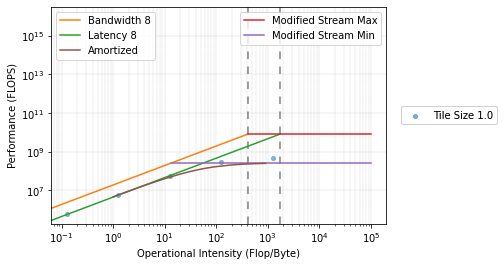

In [9]:
pi = []
# rate = simple["scaleOpts"]/(simple["scaleMin"])
# pi.append(("Default Stream Min", 0, list(rate)[0]))

# rate = simple["scaleOpts"]/(simple["scaleAve"])
# pi .append(("Default Stream Ave", 0, list(rate)[0]))

# rate = simple["scaleOpts"]/(simple["scaleMax"])
# pi.append(("Default Stream Max", 0, list(rate)[0]))

rate = serial["scaleOpts"]/(serial["scaleMin"])
# pi.append(("Modified Stream Min Min", 0, rate.min()))
pi.append(("Modified Stream Max", 0, rate.max()))

rate = serial["scaleOpts"]/(serial["scaleMax"])
pi.append(("Modified Stream Min", 0, rate.min()))
# pi.append(("Modified Stream Max Max", 0, rate.max()))

scale = data[data["tileSize"] == 1]
rate = scale["arraySize"]*scale["reps"]/(scale["scaleMin"])
dataToPlot = {"Tile Size " + str(tileSize):( list(scale["arraySize"] * scale["reps"] / (scale["arraySize"] * 8)), list(rate) )}

rf = rfm.Roofline(pi, betas, "Operational Intensity (Flop/Byte)", "Performance (FLOPS)", xlim=(1, 1E5), ylim=(1E8, 1E16))
rf.addAmortized("Amortized", "Modified Stream Min", "Latency 8")
rf.addData(dataToPlot)
rf.plot()

The range provide of $\pi$'s provided above cover the minimum and maximum performance observed across the tested tile sizes.  The plot below show the minimum and maximum performance for a single tile size corresponding to our data (tile size of 1).  Notice the bound box is more tight.

1 100000.0 100000000.0 1e+16


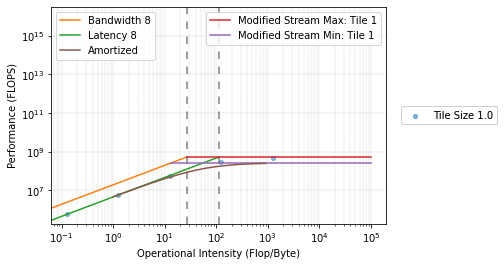

In [10]:
pi = []
rate = serial[serial["tileSize"] == 1]
rate = rate["scaleOpts"]/(rate["scaleMin"])
pi.append(("Modified Stream Max: Tile 1", 0, rate.max()))

rate = serial[serial["tileSize"] == 1]
rate = rate["scaleOpts"]/(rate["scaleMax"])
pi.append(("Modified Stream Min: Tile 1", 0, rate.min()))

scale = data[data["tileSize"] == 1]
rate = scale["arraySize"]*scale["reps"]/(scale["scaleMin"])
dataToPlot = {"Tile Size " + str(tileSize):( list(scale["arraySize"] * scale["reps"] / (scale["arraySize"] * 8)), list(rate) )}

rf = rfm.Roofline(pi, betas, "Operational Intensity (Flop/Byte)", "Performance (FLOPS)", xlim=(1, 1E5), ylim=(1E8, 1E16))
rf.addAmortized("Amortized", "Modified Stream Min: Tile 1", "Latency 8")
rf.addData(dataToPlot)
rf.plot()

## Exploring $\pi$
The performance of the modified stream benchmark has several interesting effects happening at the same time.  The following is an initial exploration.  The most probable cause in performance difference and we change the tile size and reps is the cache.

In the first plot, we see that the number of reps acts as a scaler on the total time.  We can see in the second graph, when we normalize by the number of operations to get the performance (i.e. a throughput rate), the effect of the number of reps mostly disappears with the exception of the single rep case.

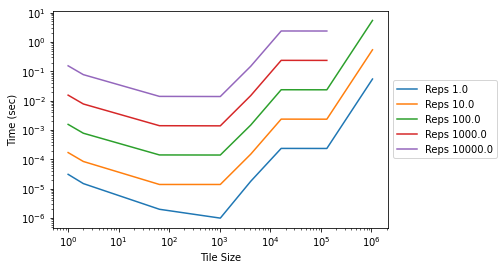

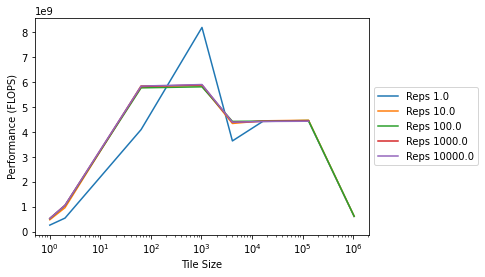

In [11]:

minMaxAve = "scaleAve"
reps = serial["reps"].unique().tolist()

# plt.scatter(1, simple[minMaxAve], label="Base")
for rep in reps:
        toPlot = serial[(serial["reps"] == rep)]
        toPlot = toPlot.sort_values(by=["tileSize"])
        plt.plot(toPlot["tileSize"], toPlot[minMaxAve], label="Reps " + str(rep))

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Tile Size")
plt.ylabel("Time (sec)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

for rep in reps:
        toPlot = serial[(serial["reps"] == rep)]
        toPlot = toPlot.sort_values(by=["tileSize"])
        plt.plot(toPlot["tileSize"], toPlot["arraySize"]*toPlot["reps"]/toPlot[minMaxAve], label="Reps " + str(rep))

plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Tile Size")
plt.ylabel("Performance (FLOPS)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


Next we try interchanging the tile and reps loop to guess if this is what the compiler is doing as this would have a significant cache effect.  When we look at the resulting graphs, we observe a very different performance profile suggesting this is not what the compiler is doing.

Ultimately it seems we have more work to do to understand how tight we can make the pi upper bound.

Reading ../data/junction/csvs/___data_junction_raw_stream_interchange.csv


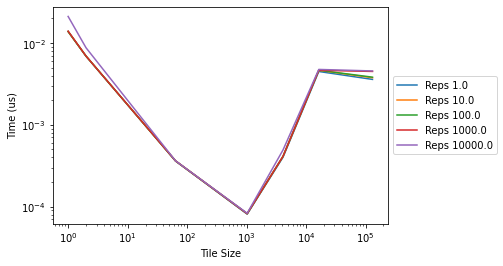

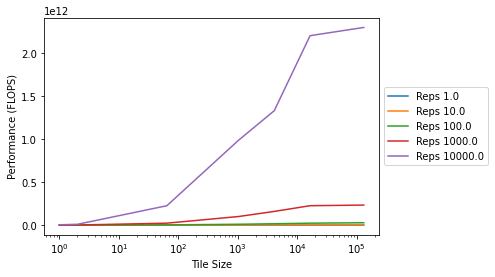

In [12]:
interchangeResults = "../data/junction/raw/stream_interchange"
loop = rfm.getStreamDataframe(interchangeResults, csvDir=csvDir)
loop = loop[loop["which"] == "send"]

reps = loop["reps"].unique().tolist()

# plt.scatter(1, simple[minMaxAve], label="Base")
for rep in reps:
        toPlot = loop[(loop["reps"] == rep)]
        toPlot = toPlot.sort_values(by=["tileSize"])
        plt.plot(toPlot["tileSize"], toPlot[minMaxAve], label="Reps " + str(rep))

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Tile Size")
plt.ylabel("Time (us)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

for rep in reps:
        toPlot = loop[(loop["reps"] == rep)]
        toPlot = toPlot.sort_values(by=["tileSize"])
        plt.plot(toPlot["tileSize"], toPlot["arraySize"]*toPlot["reps"]/toPlot[minMaxAve], label="Reps " + str(rep))

plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Tile Size")
plt.ylabel("Performance (FLOPS)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()